In [5]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)    # 解决windows环境下画图汉字乱码问题

# 加载txt和csv文件
def loadtxtAndcsv_data(fileName,split,dataType):
    return np.loadtxt(fileName,delimiter=split,dtype=dataType)

# 归一化feature
def featureNormaliza(X):
    X_norm = np.array(X)            #将X转化为numpy数组对象，才可以进行矩阵的运算
    #定义所需变量
    mu = np.zeros((1,X.shape[1]))   
    sigma = np.zeros((1,X.shape[1]))
    
    # 均值方差归一化
    mu = np.mean(X_norm,0)          # 求每一列的平均值（0指定为列，1代表行）
    sigma = np.std(X_norm,0)        # 求每一列的标准差
    for i in range(X.shape[1]):     # 遍历列
        X_norm[:,i] = (X_norm[:,i]-mu[i])/sigma[i]  # 归一化
    
    return X_norm,mu,sigma

# 梯度下降算法
def gradientDescent(X,y,theta,alpha,num_iters):
    m = len(y)      
    n = len(theta)
    
    temp = np.matrix(np.zeros((n,num_iters)))   # 暂存每次迭代计算的theta，转化为矩阵形式    
    
    J_history = np.zeros((num_iters,1)) #记录每次迭代计算的代价值
    
    for i in range(num_iters):  # 遍历迭代次数    
        h = np.dot(X,theta)     # 计算内积，matrix可以直接乘
        temp[:,i] = theta - ((alpha/m)*(np.dot(np.transpose(X),h-y)))   #梯度的计算
        theta = temp[:,i]
        J_history[i] = computerCost(X,y,theta)      #调用计算代价函数
        print('.', end=' ')      
    return theta,J_history  

# 计算代价函数
def computerCost(X,y,theta):
    m = len(y)
    J = 0
    
    J = (np.transpose(X*theta-y))*(X*theta-y)/(2*m) #计算代价J
    return J

# 画每次迭代代价的变化图
def plotJ(J_history,num_iters):
    x = np.arange(1,num_iters+1)
    plt.plot(x,J_history)
    plt.xlabel(u"迭代次数",fontproperties=font) # 注意指定字体，要不然出现乱码问题
    plt.ylabel(u"代价值",fontproperties=font)
    plt.title(u"代价随迭代次数的变化",fontproperties=font)
    plt.show()

# 画二维图
def plot_X1_X2(X):
    plt.scatter(X[:,0],X[:,1])
    plt.show()

def linearRegression(alpha=0.01,num_iters=400):
    print(u"加载数据...\n")
        
    data = loadtxtAndcsv_data("data.txt",",",np.float64)  #读取数据
    X = data[:,0:-1]      # X对应0到倒数第2列                  
    y = data[:,-1]        # y对应最后一列  
    m = len(y)            # 总的数据条数
    col = data.shape[1]      # data的列数
    plot_X1_X2(X)         # 画图看一下归一化效果
    print(u"\n归一化后，数据分布散点图\n")
    X,mu,sigma = featureNormaliza(X)    # 归一化
    plot_X1_X2(X)         # 画图看一下归一化效果
    
    X = np.hstack((np.ones((m,1)),X))    # 在X前加一列1
    
    print(u"\n执行梯度下降算法....\n")
    
    theta = np.zeros((col,1))
    y = y.reshape(-1,1)   #将行向量转化为列
    theta,J_history = gradientDescent(X, y, theta, alpha, num_iters)
    
    plotJ(J_history, num_iters)
    
    return mu,sigma,theta   #返回均值mu,标准差sigma,和学习的结果theta

# 测试学习效果（预测）
def predict(mu,sigma,theta):
    result = 0
    # 注意归一化
    predict = np.array([1650,3])
    norm_predict = (predict-mu)/sigma
    final_predict = np.hstack((np.ones((1)),norm_predict))
    
    result = np.dot(final_predict,theta)    # 预测结果
    return result

加载数据...



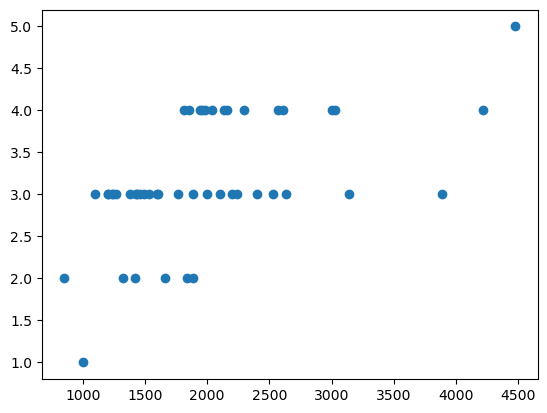


归一化后，数据分布散点图



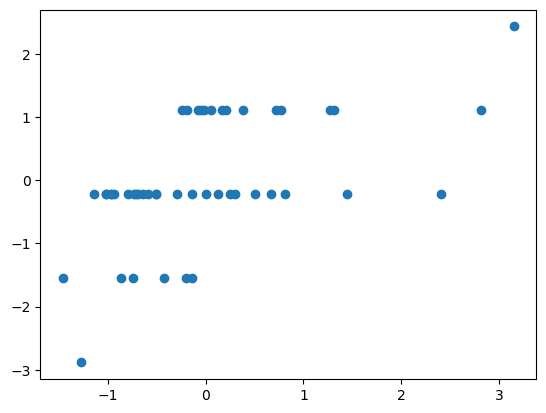


执行梯度下降算法....

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

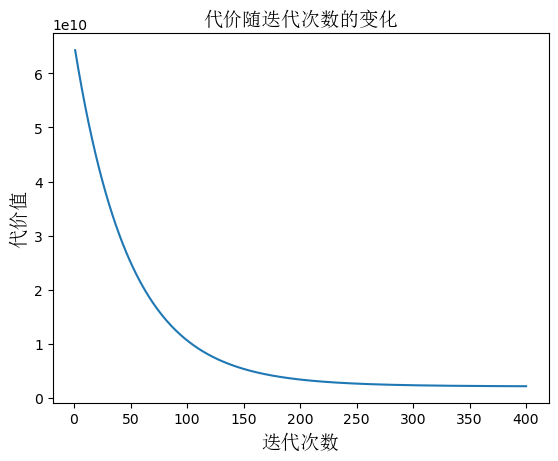


计算的theta值为：
 [[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]

预测结果为：289221.547371


In [20]:
print(u"加载数据...\n")
    
data = loadtxtAndcsv_data("data.txt",",",np.float64)  #读取数据
X = data[:,0:-1]      # X对应0到倒数第2列                  
y = data[:,-1]        # y对应最后一列  
m = len(y)            # 总的数据条数
col = data.shape[1]      # data的列数

plot_X1_X2(X)         # 画图看一下归一化效果
print(u"\n归一化后，数据分布散点图\n")
X,mu,sigma = featureNormaliza(X)    # 归一化
plot_X1_X2(X)         # 画图看一下归一化效果

X = np.hstack((np.ones((m,1)),X))    # 在X前加一列1

print(u"\n执行梯度下降算法....\n")

alpha = 0.01
num_iters = 400
W_i = np.zeros((col,1))  # w0,w1,w2
y = y.reshape(-1,1)   #将行向量转化为列
theta,J_history = gradientDescent(X, y, W_i, alpha, num_iters)

plotJ(J_history, num_iters)

print (u"\n计算的theta值为：\n",theta)
print (u"\n预测结果为：%f"%predict(mu, sigma, theta))

In [19]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler    #引入归一化的包

data = loadtxtAndcsv_data("data.txt",",",np.float64)  #读取数据
X = np.array(data[:,0:-1],dtype=np.float64)      # X对应0到倒数第2列                  
y = np.array(data[:,-1],dtype=np.float64)        # y对应最后一列  
    
# 归一化操作
scaler = StandardScaler()   
scaler = scaler.fit(X)
x_train = scaler.transform(X)
x_test = scaler.transform([[1650,3]])

# 线性模型拟合
model = linear_model.LinearRegression()
model.fit(x_train, y)

#预测结果
result = model.predict(x_test)
print(model.coef_)       # Coefficient of the features 决策函数中的特征系数
print(model.intercept_)  # 又名bias偏置,若设置为False，则为0
print(result)            # 预测结果

[1650.    3.]
[109447.79646964  -6578.35485416]
340412.6595744681
[293081.4643349]
